In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset, convet2dataframe
# ARIMA model with library Darts 
from darts import TimeSeries
from darts.models import AutoARIMA
from darts.metrics import mape
from darts.metrics import mase
from darts.metrics import r2_score
from darts.metrics import rmse
from darts.metrics import mse
from darts.metrics import mae
import warnings 
warnings.filterwarnings("ignore")


/workspaces/period_cycle_prediction/cilab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Case 1

In [2]:
# load the data
total_regular_cycle_data = pd.read_csv('dataset/total_regular_cycle_data.csv')
features_total_regular_cycle_data, labels_total_regular_cycle_data = generate_final_features(total_regular_cycle_data)
input_train_total_regular_cycle, input_test_total_regular_cycle, output_train_total_regular_cycle, output_test_total_regular_cycle = split_dataset(features_total_regular_cycle_data, labels_total_regular_cycle_data, reshape=False)

input_train_total_regular_cycle_df = convet2dataframe(input_train_total_regular_cycle, ['period', 'cycle'])
output_train_total_regular_cycle = convet2dataframe(output_train_total_regular_cycle, ['period', 'cycle'])
input_test_total_regular_cycle_df = convet2dataframe(input_test_total_regular_cycle, ['period', 'cycle'])
series_test = TimeSeries.from_dataframe(input_test_total_regular_cycle_df, 'time', ['period'])
output_train_series = TimeSeries.from_dataframe(output_train_total_regular_cycle, 'time', ['period'])
series = TimeSeries.from_dataframe(input_train_total_regular_cycle_df, time_col='time', value_cols=['period'])

# series for cycle prediction
series_cycle = TimeSeries.from_dataframe(input_train_total_regular_cycle_df, time_col='time', value_cols=['cycle'])
series_cycle_test = TimeSeries.from_dataframe(input_test_total_regular_cycle_df, time_col='time', value_cols=['cycle'])

# train the model
model = AutoARIMA()
model.fit(series)

# make prediction
prediction = model.predict(3)
#-----------------------------------#
# model arima for cycle 
model_cycle = AutoARIMA()
model_cycle.fit(series_cycle)
# prediction the cycle 
prediction_cycle = model_cycle.predict(3)
prediction_cycle

In [ ]:
# reset matplotlib to the default style 
plt.rcParams.update(plt.rcParamsDefault)

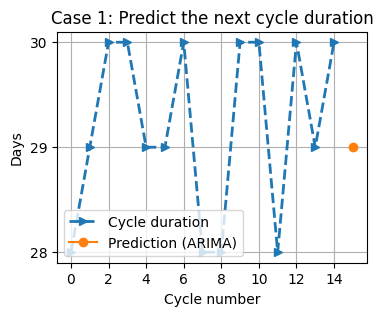

In [ ]:
# plot baseline and predictions

plt.figure(figsize=(4, 3))
plt.plot(series_test.values()[-16:], '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),prediction.values()[0].astype(int), '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (ARIMA)'], loc='lower left')
plt.title('Case 1: Predict the next cycle duration')
plt.grid(True)
plt.show()

## Case 2

In [11]:
regular_cycle_data = pd.read_csv('dataset/regular_cycle_data.csv')
features_regular_cycle_data, labels_regular_cycle_data = generate_final_features(regular_cycle_data)
input_train_regular_cycle, input_test_regular_cycle, output_train_regular_cycle, output_test_regular_cycle = split_dataset(features_regular_cycle_data, labels_regular_cycle_data, reshape=False)

#convert2dataframe
input_train_regular_cycle = convet2dataframe(input_train_regular_cycle,  ['period', 'cycle'])
input_test_regular_cycle = convet2dataframe(input_test_regular_cycle,  ['period', 'cycle'])
output_train_regular_cycle = convet2dataframe(output_train_regular_cycle,  ['period', 'cycle'])

#series
series_train_regular_cycle = TimeSeries.from_dataframe(input_train_regular_cycle, time_col='time', value_cols=['period'])
series_test_regular_cycle = TimeSeries.from_dataframe(input_test_regular_cycle, time_col='time', value_cols=['period'])

#series
seriescycle_train_regular_cycle = TimeSeries.from_dataframe(input_train_regular_cycle, time_col='time', value_cols=['cycle'])
seriescycle_test_regular_cycle = TimeSeries.from_dataframe(input_test_regular_cycle, time_col='time', value_cols=['cycle'])

# modelo ARIMA

model_regular_cycle = AutoARIMA()
model_regular_cycle.fit(series_train_regular_cycle)

modelcycle_regular_cycle = AutoARIMA()
modelcycle_regular_cycle.fit(seriescycle_train_regular_cycle)

# predict

prediction_regular_cycle = model_regular_cycle.predict(len(series_test_regular_cycle))

predictioncycle_regular_cycle = modelcycle_regular_cycle.predict(len(seriescycle_test_regular_cycle))



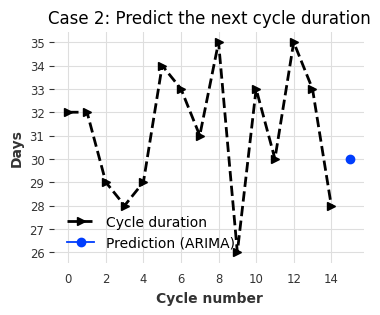

In [10]:
# plot baseline and predictions

plt.figure(figsize=(4, 3))
plt.plot(series_test_regular_cycle.values()[-16:], '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),prediction_regular_cycle.values()[0].astype(int), '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (ARIMA)'], loc='lower left')
plt.title('Case 2: Predict the next cycle duration')
plt.grid(True)
plt.show()

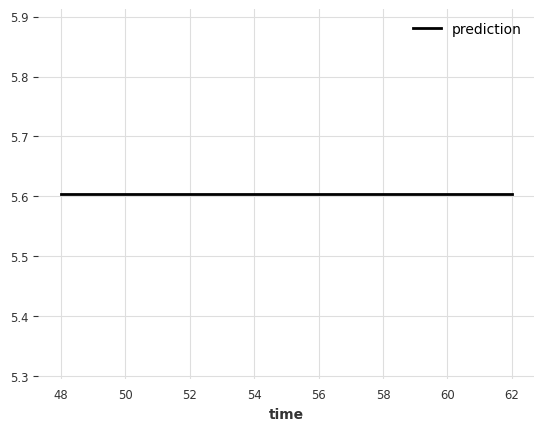

In [13]:
predictioncycle_regular_cycle.plot(label='prediction')

## Case 3

In [20]:
irregular_cycle_data = pd.read_csv('dataset/irregular_cycle_data.csv')
features_irregular_cycle_data, labels_irregular_cycle_data = generate_final_features(irregular_cycle_data)
input_train_irregular_cycle, input_test_irregular_cycle, output_train_irregular_cycle, output_test_irregular_cycle = split_dataset(features_irregular_cycle_data, labels_irregular_cycle_data, reshape=False)

#convert2dataframe
input_train_irregular_cycle = convet2dataframe(input_train_irregular_cycle,  ['period', 'cycle'])

input_test_irregular_cycle = convet2dataframe(input_test_irregular_cycle,  ['period', 'cycle'])

output_train_irregular_cycle = convet2dataframe(output_train_irregular_cycle,  ['period', 'cycle'])

#series

series_train_irregular_cycle = TimeSeries.from_dataframe(input_train_irregular_cycle, time_col='time', value_cols=['period'])

series_test_irregular_cycle = TimeSeries.from_dataframe(input_test_irregular_cycle, time_col='time', value_cols=['period'])

#series cycle 

seriescycle_train_irregular_cycle = TimeSeries.from_dataframe(input_train_irregular_cycle, time_col='time', value_cols=['cycle'])

seriescycle_test_irregular_cycle = TimeSeries.from_dataframe(input_test_irregular_cycle, time_col='time', value_cols=['cycle'])

# modelo ARIMA

model_irregular_cycle = AutoARIMA()

model_irregular_cycle.fit(series_train_irregular_cycle)

# model cycle

modelcycle_irregular_cycle = AutoARIMA()

modelcycle_irregular_cycle.fit(seriescycle_train_irregular_cycle)


# predict

prediction_irregular_cycle = model_irregular_cycle.predict(3)

# predict cycle

predictioncycle_irregular_cycle = modelcycle_irregular_cycle.predict(len(seriescycle_test_irregular_cycle))

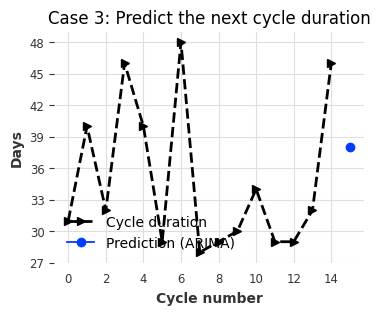

In [21]:
# plot baseline and predictions

plt.figure(figsize=(4, 3))
plt.plot(series_test_irregular_cycle.values()[-16:], '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),prediction_irregular_cycle.values()[0].astype(int), '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (ARIMA)'], loc='lower left')
plt.title('Case 3: Predict the next cycle duration')
plt.grid(True)
plt.show()

In [ ]:
# implemment varima model with darts 
from darts.models import VARIMA

series_multivariate = TimeSeries.from_dataframe(input_train_total_regular_cycle_df, time_col='time', value_cols=['period', 'cycle'])

model = VARIMA(p=1, q=0)
model.fit(series_multivariate)



VARIMA(p=1, d=0, q=0, trend=None, add_encoders=None)

In [ ]:
series_multivariate.plot()

In [ ]:
prediction_multivariate = model.predict(3)
prediction_multivariate.plot(label='Predicted')

In [ ]:
prediction_multivariate

<TimeSeries (DataArray) (time: 3, component: 2, sample: 1)>
array([[[-4.26675967e-10],
        [ 2.77933501e-07]],

       [[-2.41742875e-17],
        [ 1.57469482e-14]],

       [[-1.36964869e-24],
        [ 8.92178804e-22]]])
Coordinates:
  * time       (time) int64 48 49 50
  * component  (component) object 'period' 'cycle'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None